In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [5]:
# Explore

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
# No nulls

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


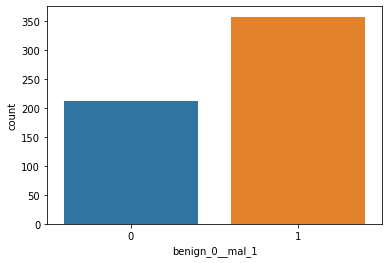

In [8]:
sns.countplot(x='benign_0__mal_1', data=df)

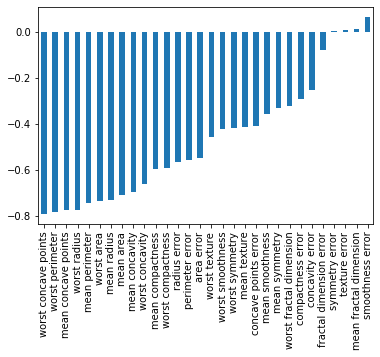

In [12]:
# Relatively balanced classes, we have more cases of malignant tumors

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

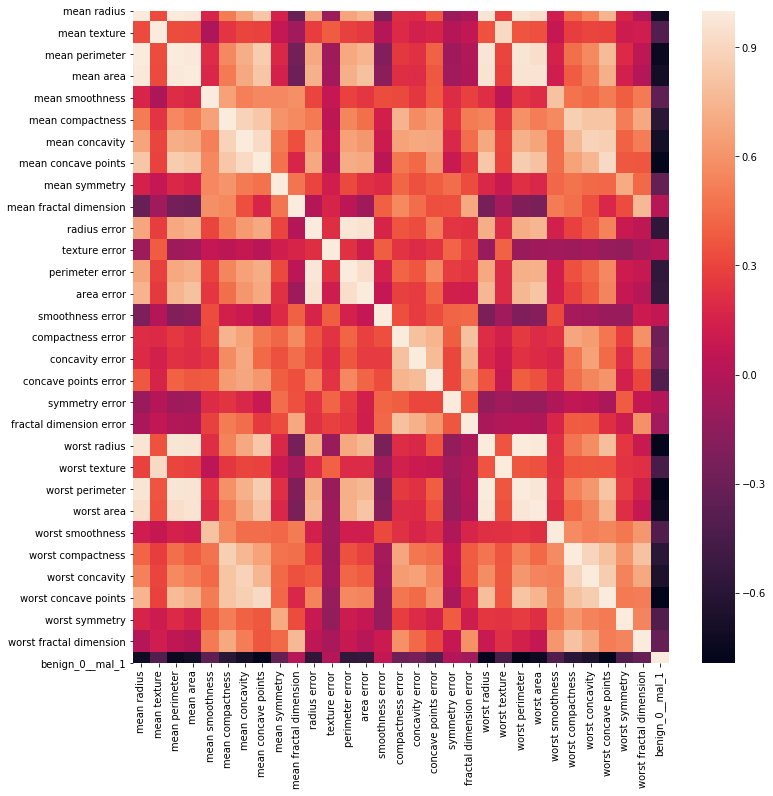

In [15]:
# Most features are negatively cor to our targer
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [16]:
# Create features + target
features = df.drop('benign_0__mal_1', axis=1).values
target = df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    test_size=0.25, 
    random_state=101,
)

In [18]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
# We don't fit to test data because we don't want
# data leakage
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation

In [25]:
X_train.shape

# We have about 30 features in this data

(426, 30)

In [26]:
# Create model
model = Sequential()

# Create layers
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(30, activation='relu'))

# Output layer, since this is a binary classification 
# problem, our activation function will be a sigmoid
model.add(Dense(1, activation='sigmoid'))

# Compile model with binary cross entropy (since this is
# a binary class problem)
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
# Train model, we're doing 600 epochs cuz we will learn
# what overfitting looks like
model.fit(
    x=X_train,
    y=y_train,
    epochs=600,
    validation_data=(X_test, y_test)
)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6862 - val_loss: 0.6747
Epoch 2/600
426/426 [==============================] - 0s 238us/sample - loss: 0.6572 - val_loss: 0.6416
Epoch 3/600
426/426 [==============================] - 0s 222us/sample - loss: 0.6213 - val_loss: 0.6010
Epoch 4/600
426/426 [==============================] - 0s 267us/sample - loss: 0.5743 - val_loss: 0.5475
Epoch 5/600
426/426 [==============================] - 0s 264us/sample - loss: 0.5127 - val_loss: 0.4776
Epoch 6/600
426/426 [==============================] - 0s 259us/sample - loss: 0.4401 - val_loss: 0.3990
Epoch 7/600
426/426 [==============================] - 0s 233us/sample - loss: 0.3697 - val_loss: 0.3252
Epoch 8/600
426/426 [==============================] - 0s 265us/sample - loss: 0.3094 - val_loss: 0.2738
Epoch 9/600
426/426 [==============================] - 0s 229us/sample - loss: 0.2648 - val_loss: 0.2288
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 281us/sample - loss: 0.0479 - val_loss: 0.1057
Epoch 79/600
426/426 [==============================] - 0s 217us/sample - loss: 0.0479 - val_loss: 0.1710
Epoch 80/600
426/426 [==============================] - 0s 236us/sample - loss: 0.0550 - val_loss: 0.1045
Epoch 81/600
426/426 [==============================] - 0s 222us/sample - loss: 0.0480 - val_loss: 0.1254
Epoch 82/600
426/426 [==============================] - 0s 341us/sample - loss: 0.0530 - val_loss: 0.1537
Epoch 83/600
426/426 [==============================] - 0s 363us/sample - loss: 0.0523 - val_loss: 0.1061
Epoch 84/600
426/426 [==============================] - 0s 230us/sample - loss: 0.0501 - val_loss: 0.1086
Epoch 85/600
426/426 [==============================] - 0s 231us/sample - loss: 0.0439 - val_loss: 0.1221
Epoch 86/600
426/426 [==============================] - 0s 252us/sample - loss: 0.0455 - val_loss: 0.1216
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 351us/sample - loss: 0.0370 - val_loss: 0.1325
Epoch 156/600
426/426 [==============================] - 0s 420us/sample - loss: 0.0396 - val_loss: 0.1642
Epoch 157/600
426/426 [==============================] - 0s 253us/sample - loss: 0.0389 - val_loss: 0.1289
Epoch 158/600
426/426 [==============================] - 0s 270us/sample - loss: 0.0371 - val_loss: 0.1322
Epoch 159/600
426/426 [==============================] - 0s 261us/sample - loss: 0.0362 - val_loss: 0.1447
Epoch 160/600
426/426 [==============================] - 0s 279us/sample - loss: 0.0366 - val_loss: 0.1323
Epoch 161/600
426/426 [==============================] - 0s 286us/sample - loss: 0.0386 - val_loss: 0.1284
Epoch 162/600
426/426 [==============================] - 0s 268us/sample - loss: 0.0438 - val_loss: 0.2159
Epoch 163/600
426/426 [==============================] - 0s 319us/sample - loss: 0.0437 - val_loss: 0.1226
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 250us/sample - loss: 0.0288 - val_loss: 0.1753
Epoch 308/600
426/426 [==============================] - 0s 249us/sample - loss: 0.0267 - val_loss: 0.1766
Epoch 309/600
426/426 [==============================] - 0s 257us/sample - loss: 0.0290 - val_loss: 0.2383
Epoch 310/600
426/426 [==============================] - 0s 248us/sample - loss: 0.0313 - val_loss: 0.1634
Epoch 311/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0229 - val_loss: 0.2319
Epoch 312/600
426/426 [==============================] - 0s 262us/sample - loss: 0.0303 - val_loss: 0.1718
Epoch 313/600
426/426 [==============================] - 0s 252us/sample - loss: 0.0315 - val_loss: 0.2300
Epoch 314/600
426/426 [==============================] - 0s 261us/sample - loss: 0.0322 - val_loss: 0.1645
Epoch 315/600
426/426 [==============================] - 0s 240us/sample - loss: 0.0313 - val_loss: 0.2219
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 365us/sample - loss: 0.0182 - val_loss: 0.3317
Epoch 460/600
426/426 [==============================] - 0s 403us/sample - loss: 0.0147 - val_loss: 0.3064
Epoch 461/600
426/426 [==============================] - ETA: 0s - loss: 0.001 - 0s 476us/sample - loss: 0.0097 - val_loss: 0.2777
Epoch 462/600
426/426 [==============================] - 0s 423us/sample - loss: 0.0097 - val_loss: 0.3343
Epoch 463/600
426/426 [==============================] - 0s 319us/sample - loss: 0.0129 - val_loss: 0.2996
Epoch 464/600
426/426 [==============================] - 0s 286us/sample - loss: 0.0197 - val_loss: 0.2657
Epoch 465/600
426/426 [==============================] - 0s 280us/sample - loss: 0.0104 - val_loss: 0.3421
Epoch 466/600
426/426 [==============================] - 0s 321us/sample - loss: 0.0156 - val_loss: 0.3498
Epoch 467/600
426/426 [==============================] - 0s 404us/sample - loss: 0.0158 - val_loss: 0.2709
Epoch 468/600
426/426 [====

In [29]:
 losses = pd.DataFrame(model.history.history)

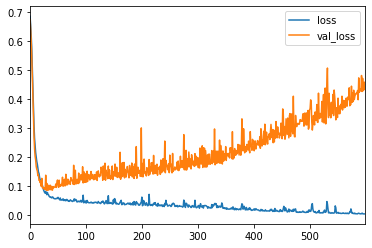

In [30]:
losses.plot()

In [32]:
# The validation loss is MUCH MUCH higher than
# training loss. We overfit the modell...

# We trained for too many epochs
# Let's see if we can use early stopping to fix it

# Create model
model = Sequential()

# Create layers
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(30, activation='relu'))

# Output layer, since this is a binary classification 
# problem, our activation function will be a sigmoid
model.add(Dense(1, activation='sigmoid'))

# Compile model with binary cross entropy (since this is
# a binary class problem)
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
# Create early stopping callback
# monitor = what are we measuring
# mode='min' stops when the quantity has stopped decreasing
# The patience params means how many epochs after the
# stopping condition should we wait until we actually stop

early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=25,
)

In [35]:
# Create model again
model = Sequential()

# Create layers
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(30, activation='relu'))

# Output layer, since this is a binary classification 
# problem, our activation function will be a sigmoid
model.add(Dense(1, activation='sigmoid'))

# Compile model with binary cross entropy (since this is
# a binary class problem)
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train again but this time, with the early_stop callback
# we created earlier. This makes it easier for us because
# we don't really have to worry about the number of epochs

model.fit(
    x=X_train,
    y=y_train,
    epochs=600,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6780 - val_loss: 0.6642
Epoch 2/600
426/426 [==============================] - 0s 239us/sample - loss: 0.6505 - val_loss: 0.6295
Epoch 3/600
426/426 [==============================] - 0s 265us/sample - loss: 0.6063 - val_loss: 0.5721
Epoch 4/600
426/426 [==============================] - 0s 239us/sample - loss: 0.5411 - val_loss: 0.4934
Epoch 5/600
426/426 [==============================] - 0s 244us/sample - loss: 0.4615 - val_loss: 0.4125
Epoch 6/600
426/426 [==============================] - 0s 262us/sample - loss: 0.3785 - val_loss: 0.3304
Epoch 7/600
426/426 [==============================] - 0s 245us/sample - loss: 0.3087 - val_loss: 0.2729
Epoch 8/600
426/426 [==============================] - 0s 244us/sample - loss: 0.2590 - val_loss: 0.2367
Epoch 9/600
426/426 [==============================] - 0s 267us/sample - loss: 0.2257 - val_loss: 0.2081
Epoch 10/60

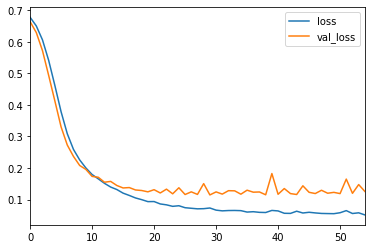

In [36]:
# Plot losses again
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [37]:
# Much better, lets see if we can make it even better
# by adding dropout layers

# Create model again
model = Sequential()

# Create layers
model.add(Dense(30, activation='relu'))

# Add drouput layer with .5 rate, meaning half 
#of the previous neurons will drop out
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))

# Add another dropout layer
model.add(Dropout(0.5))

# Output layer, since this is a binary classification 
# problem, our activation function will be a sigmoid and
# have a single neuron
model.add(Dense(1, activation='sigmoid'))

# Compile model with binary cross entropy (since this is
# a binary class problem)
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train again but this time, with the early_stop callback
# we created earlier. This makes it easier for us because
# we don't really have to worry about the number of epochs

model.fit(
    x=X_train,
    y=y_train,
    epochs=600,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.7682 - val_loss: 0.6987
Epoch 2/600
426/426 [==============================] - 0s 317us/sample - loss: 0.7155 - val_loss: 0.6640
Epoch 3/600
426/426 [==============================] - 0s 317us/sample - loss: 0.6789 - val_loss: 0.6322
Epoch 4/600
426/426 [==============================] - 0s 338us/sample - loss: 0.6326 - val_loss: 0.6017
Epoch 5/600
426/426 [==============================] - 0s 310us/sample - loss: 0.6269 - val_loss: 0.5714
Epoch 6/600
426/426 [==============================] - 0s 324us/sample - loss: 0.5859 - val_loss: 0.5411
Epoch 7/600
426/426 [==============================] - 0s 310us/sample - loss: 0.5733 - val_loss: 0.5114
Epoch 8/600
426/426 [==============================] - 0s 315us/sample - loss: 0.5645 - val_loss: 0.4841
Epoch 9/600
426/426 [==============================] - 0s 477us/sample - loss: 0.4930 - val_loss: 0.4552
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 530us/sample - loss: 0.1125 - val_loss: 0.1031
Epoch 79/600
426/426 [==============================] - 0s 350us/sample - loss: 0.1155 - val_loss: 0.1002
Epoch 80/600
426/426 [==============================] - 0s 331us/sample - loss: 0.1447 - val_loss: 0.0943
Epoch 81/600
426/426 [==============================] - 0s 373us/sample - loss: 0.1206 - val_loss: 0.0901
Epoch 82/600
426/426 [==============================] - 0s 433us/sample - loss: 0.1013 - val_loss: 0.0980
Epoch 83/600
426/426 [==============================] - 0s 395us/sample - loss: 0.1072 - val_loss: 0.1038
Epoch 84/600
426/426 [==============================] - 0s 409us/sample - loss: 0.1164 - val_loss: 0.0975
Epoch 85/600
426/426 [==============================] - 0s 354us/sample - loss: 0.1032 - val_loss: 0.0985
Epoch 86/600
426/426 [==============================] - 0s 381us/sample - loss: 0.0949 - val_loss: 0.0944
Epoch 87/600
426/426 [========================

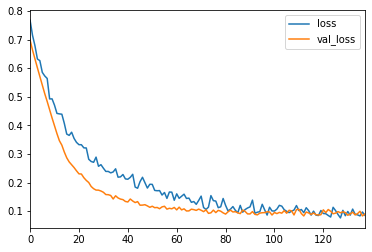

In [38]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [39]:
# Beautiful results. They are flattening out at the same
# rate, tremendous improvement

In [41]:
# Evaluation
#
# Because this is binary classification task, we are
# predicting basically a 0 or a 1, true or false
# So, we must tell the model to predict_classes, not
# just predict

# Predict on our test set
predictions = model.predict_classes(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [44]:
# Not bad, all our scores look good. F1-score is good.
# precision and recall are simlarly good. 98% accuracy

print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]


In [ ]:
# This is also good, out of all predictions, we only
# misclassified one data point in our test set